# importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import warnings as w
w.filterwarnings("ignore")
pd.set_option('display.max_rows', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pandasql

In [ ]:
import pandasql as sql

# importing data


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/intern_files/adult_data.csv",header=0)

In [ ]:
data_copy=data.copy()

In [ ]:

data_copy.columns

Index(['x', 'age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# null values present or not


In [ ]:
data_copy.isnull().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

# duplicated value

In [ ]:
data_dup=data_copy[data_copy.duplicated(keep="last")]

In [ ]:
data_dup

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:

data_copy.head()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# removing unnescessary columns

In [ ]:

del data_copy["x"]

In [ ]:
#del data_copy["relationship"]
#del data_copy["race"]
#del data_copy["marital-status"]

In [ ]:
data_copy["fnlwgt"].nunique()

28523

In [ ]:
del data_copy["fnlwgt"]

In [ ]:
for  i in data.columns:
  print(data[i].unique())

[    1     2     3 ... 48840 48841 48842]
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'A

In [ ]:
#data_copy["workclass"]=data_copy["workclass"].str.replace("Private","0")
#data_copy["workclass"]=data_copy['workclass'].fillna(method="ffill")


# computing the "?" value in data

In [ ]:
data_copy["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
data_copy["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
data_copy["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
data_copy["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
data_copy["workclass"].unique()


array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
data_copy.replace('?',np.nan,inplace=True)
data_copy.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


# placing most repeated value in "?" of a column

In [ ]:

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

data_copy['workclass'] = imputer_str.fit_transform(data_copy[['workclass']])
data_copy['occupation'] = imputer_str.fit_transform(data_copy[['occupation']])
data_copy['native-country'] = imputer_str.fit_transform(data_copy[['native-country']])

In [ ]:
#data_copy=data_copy.drop_duplicates()

In [ ]:
data_dup=data_copy[data_copy.duplicated(keep="last")]
data_dup.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
15,43,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
18,37,Private,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
24,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
26,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# storing object datatype columns in col for label encoding

In [ ]:
col=[]
for i in data_copy.columns:
  if data[i].dtypes=='object':
    col.append(i)

In [ ]:
#col=data_copy.dtypes[data_copy.dtypes=="object"]

In [ ]:
col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

# label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
for i in col:
  data_copy[i]=obj.fit_transform(data_copy[i])

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   education        48842 non-null  int64
 3   educational-num  48842 non-null  int64
 4   marital-status   48842 non-null  int64
 5   occupation       48842 non-null  int64
 6   relationship     48842 non-null  int64
 7   race             48842 non-null  int64
 8   gender           48842 non-null  int64
 9   capital-gain     48842 non-null  int64
 10  capital-loss     48842 non-null  int64
 11  hours-per-week   48842 non-null  int64
 12  native-country   48842 non-null  int64
 13  income           48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


# spliting target varibale and independent variables

In [ ]:
target_var="income"
independ_var=[]
for i in data_copy.columns:
  if i!="income":
    independ_var.append(i)
x=data_copy[independ_var]
y=data_copy[target_var]


# spliting into train and test

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((34189, 13), (14653, 13), (34189,), (14653,))

# scaling of data using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scal_obj=MinMaxScaler(feature_range=(0,1))
x_train=scal_obj.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=scal_obj.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.383562,0.000000,1.000000,0.600000,0.000000,0.000000,0.8,1.0,1.0,0.0,0.0,0.418367,0.95
1,0.109589,0.571429,0.600000,0.800000,0.666667,0.846154,0.2,1.0,1.0,0.0,0.0,0.448980,0.95
2,0.095890,0.142857,1.000000,0.600000,0.666667,0.769231,0.2,1.0,1.0,0.0,0.0,0.397959,0.95
3,0.301370,0.714286,0.800000,0.866667,0.666667,0.846154,0.2,1.0,1.0,0.0,0.0,0.602041,0.95
4,0.068493,0.428571,0.733333,0.533333,0.333333,0.384615,0.0,1.0,1.0,0.0,0.0,0.397959,0.95


In [ ]:
data.head()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# importing new file for storing values each models

In [ ]:
EMResults=pd.read_csv("/content/drive/MyDrive/intern_files/EMResults.csv",header=0)

# using all regresion models on data

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1503  1898]
 [  660 10592]]
Outcome values : 
 1503 1898 660 10592
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.44      0.54      3401
           0       0.85      0.94      0.89     11252

    accuracy                           0.83     14653
   macro avg       0.77      0.69      0.72     14653
weighted avg       0.81      0.83      0.81     14653

Accuracy : 82.5 %
Precision : 69.5 %
Recall : 44.2 %
F1 Score : 0.54
Specificity or True Negative Rate : 94.1 %
Balanced Accuracy : 69.2 %
MCC : 0.456
roc_auc_score: 0.692


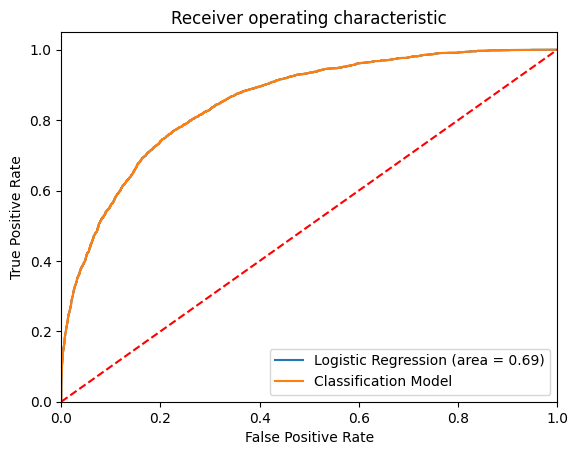

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[2031 1370]
 [1361 9891]]
Outcome values : 
 2031 1370 1361 9891
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.60      0.60      3401
           0       0.88      0.88      0.88     11252

    accuracy                           0.81     14653
   macro avg       0.74      0.74      0.74     14653
weighted avg       0.81      0.81      0.81     14653

Accuracy : 81.4 %
Precision : 59.9 %
Recall : 59.7 %
F1 Score : 0.598
Specificity or True Negative Rate : 87.9 %
Balanced Accuracy : 73.8 %
MCC : 0.477
roc_auc_score: 0.738


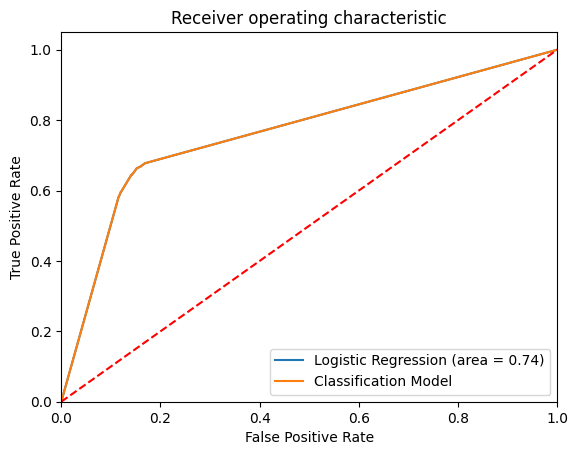

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 2139  1262]
 [  906 10346]]
Outcome values : 
 2139 1262 906 10346
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.63      0.66      3401
           0       0.89      0.92      0.91     11252

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.78     14653
weighted avg       0.85      0.85      0.85     14653

Accuracy : 85.2 %
Precision : 70.2 %
Recall : 62.9 %
F1 Score : 0.664
Specificity or True Negative Rate : 91.9 %
Balanced Accuracy : 77.4 %
MCC : 0.571
roc_auc_score: 0.774


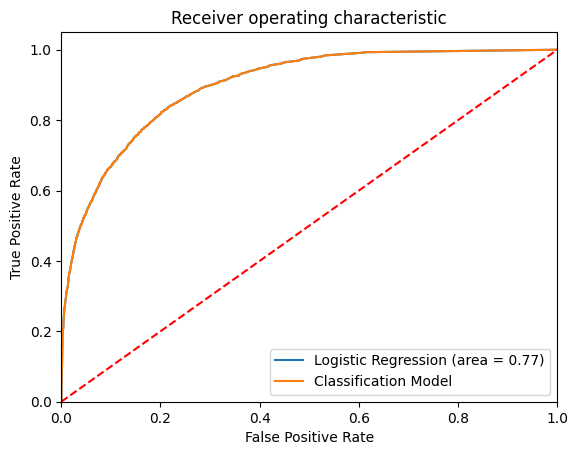

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 2067  1334]
 [  984 10268]]
Outcome values : 
 2067 1334 984 10268
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.61      0.64      3401
           0       0.89      0.91      0.90     11252

    accuracy                           0.84     14653
   macro avg       0.78      0.76      0.77     14653
weighted avg       0.84      0.84      0.84     14653

Accuracy : 84.2 %
Precision : 67.7 %
Recall : 60.8 %
F1 Score : 0.641
Specificity or True Negative Rate : 91.3 %
Balanced Accuracy : 76.0 %
MCC : 0.541
roc_auc_score: 0.76


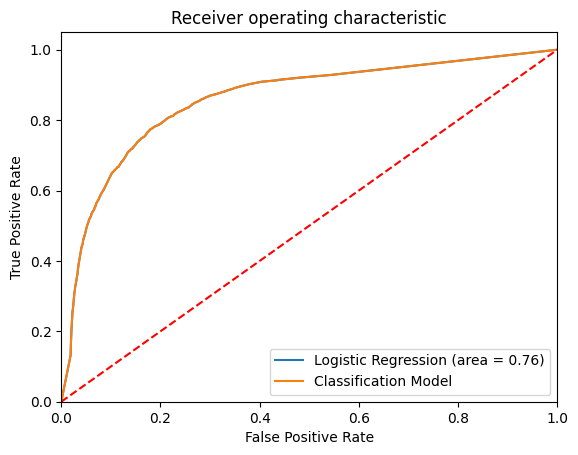

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1984  1417]
 [ 1046 10206]]
Outcome values : 
 1984 1417 1046 10206
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.58      0.62      3401
           0       0.88      0.91      0.89     11252

    accuracy                           0.83     14653
   macro avg       0.77      0.75      0.75     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy : 83.2 %
Precision : 65.5 %
Recall : 58.3 %
F1 Score : 0.617
Specificity or True Negative Rate : 90.7 %
Balanced Accuracy : 74.5 %
MCC : 0.511
roc_auc_score: 0.745


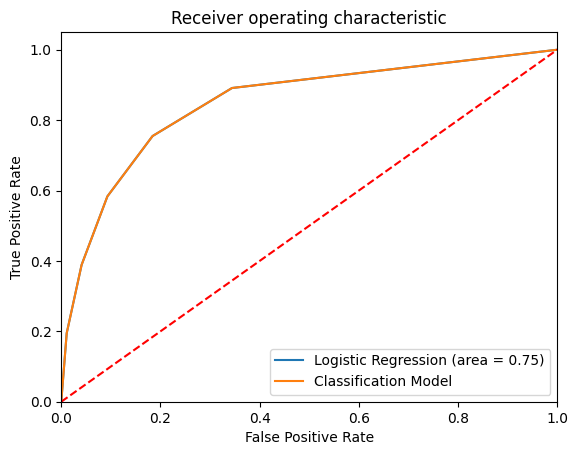

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1175  2226]
 [  560 10692]]
Outcome values : 
 1175 2226 560 10692
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.35      0.46      3401
           0       0.83      0.95      0.88     11252

    accuracy                           0.81     14653
   macro avg       0.75      0.65      0.67     14653
weighted avg       0.79      0.81      0.79     14653

Accuracy : 81.0 %
Precision : 67.7 %
Recall : 34.5 %
F1 Score : 0.458
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 64.8 %
MCC : 0.386
roc_auc_score: 0.648


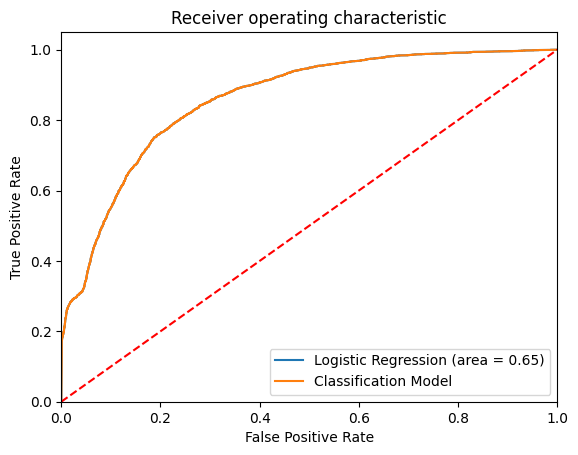

-----------------------------------------------------------------------------------------------------


In [ ]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM1 = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelSVM2 = SVC(kernel='linear', random_state=0)
ModelSVM3= SVC(kernel='poly', random_state=0)


ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[2985  416]
 [2806 8446]]
Outcome values : 
 2985 416 2806 8446
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.88      0.65      3401
           0       0.95      0.75      0.84     11252

    accuracy                           0.78     14653
   macro avg       0.73      0.81      0.74     14653
weighted avg       0.85      0.78      0.80     14653

Accuracy : 78.0 %
Precision : 51.5 %
Recall : 87.8 %
F1 Score : 0.649
Specificity or True Negative Rate : 75.1 %
Balanced Accuracy : 81.4 %
MCC : 0.543
roc_auc_score: 0.814


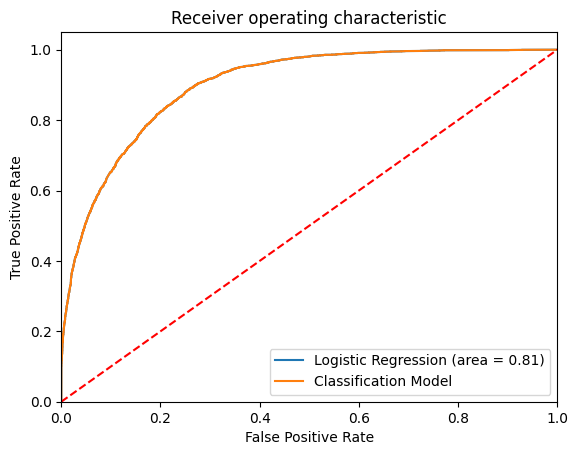

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(kernel='linear', probability=True, random_state=0)
Confusion matrix : 
 [[ 1053  2348]
 [  283 10969]]
Outcome values : 
 1053 2348 283 10969
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.31      0.44      3401
           0       0.82      0.97      0.89     11252

    accuracy                           0.82     14653
   macro avg       0.81      0.64      0.67     14653
weighted avg       0.82      0.82      0.79     14653

Accuracy : 82.0 %
Precision : 78.8 %
Recall : 31.0 %
F1 Score : 0.445
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 64.2 %
MCC : 0.417
roc_auc_score: 0.642


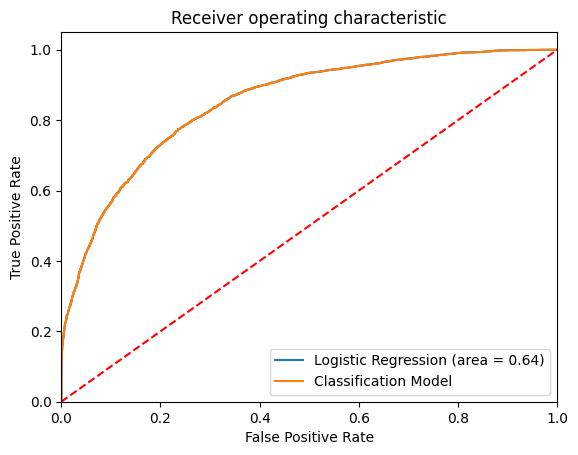

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(gamma=2, kernel='poly', probability=True, random_state=0)
Confusion matrix : 
 [[ 1942  1459]
 [  721 10531]]
Outcome values : 
 1942 1459 721 10531
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.57      0.64      3401
           0       0.88      0.94      0.91     11252

    accuracy                           0.85     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653

Accuracy : 85.1 %
Precision : 72.9 %
Recall : 57.1 %
F1 Score : 0.641
Specificity or True Negative Rate : 93.6 %
Balanced Accuracy : 75.4 %
MCC : 0.555
roc_auc_score: 0.753


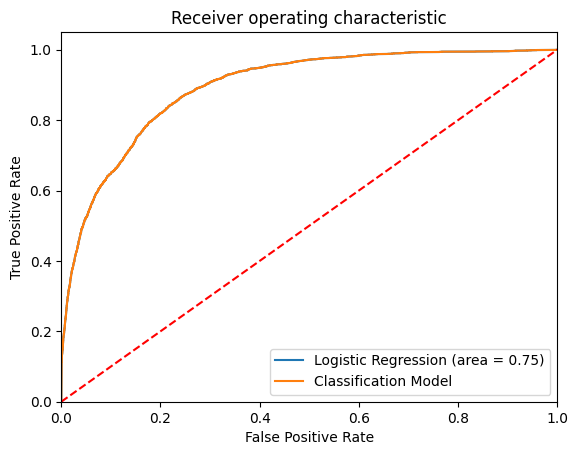

-----------------------------------------------------------------------------------------------------


In [ ]:



# Create objects of classification algorithm with default hyper-parameters
ModelSVM1=SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelSVM2=SVC(kernel='linear', random_state=0,gamma='scale',probability=True)
ModelSVM3=SVC(kernel='poly', random_state=0,gamma=2,probability=True)



MM = [ModelSVM1,ModelSVM2,ModelSVM3]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [ ]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1503,1898,660,10592,0.825,0.695,0.442,0.540,0.941,0.456,0.691636,0.692
1,DecisionTreeClassifier(),2031,1370,1361,9891,0.814,0.599,0.597,0.598,0.879,0.477,0.738111,0.738
2,"(DecisionTreeClassifier(max_features='sqrt', r...",2139,1262,906,10346,0.852,0.702,0.629,0.664,0.919,0.571,0.774207,0.774
3,"(ExtraTreeClassifier(random_state=1487141044),...",2067,1334,984,10268,0.842,0.677,0.608,0.641,0.913,0.541,0.760156,0.760
4,KNeighborsClassifier(),1984,1417,1046,10206,0.832,0.655,0.583,0.617,0.907,0.511,0.745198,0.745
5,GaussianNB(),1175,2226,560,10692,0.810,0.677,0.345,0.458,0.950,0.386,0.647859,0.648
6,"SVC(class_weight='balanced', probability=True,...",2985,416,2806,8446,0.780,0.515,0.878,0.649,0.751,0.543,0.814153,0.814
7,"SVC(kernel='linear', probability=True, random_...",1053,2348,283,10969,0.820,0.788,0.310,0.445,0.975,0.417,0.642232,0.642
8,"SVC(gamma=2, kernel='poly', probability=True, ...",1942,1459,721,10531,0.851,0.729,0.571,0.641,0.936,0.555,0.753466,0.754


In [ ]:
y_pred=ModelSVM3.predict(x_test)


In [ ]:

result=pd.DataFrame({"income_actual":y_test,"income_pred":y_pred})


In [ ]:
data=data.merge(result,right_index=True,left_index=True)

In [ ]:
data.sample(10)

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_actual,income_pred
35478,35479,40,Private,184857,HS-grad,9,Separated,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K,0,0
31216,31217,23,State-gov,61743,5th-6th,3,Never-married,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K,0,0
14955,14956,32,Private,70377,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K,0,0
18622,18623,45,Private,107787,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Canada,<=50K,0,0
8589,8590,43,Private,84673,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,38,United-States,>50K,1,0
5035,5036,61,State-gov,103575,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,Germany,<=50K,0,0
16479,16480,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K,1,1
22322,22323,26,Self-emp-not-inc,227858,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,48,United-States,<=50K,0,0
12948,12949,39,State-gov,195148,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,0,0
42374,42375,62,?,68461,Doctorate,16,Married-civ-spouse,?,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,>50K,1,1
